# Gráficos e informações para poster da EXPOTEC

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [6]:
lic = pd.read_csv("lic.csv")
lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199518 entries, 0 to 199517
Data columns (total 23 columns):
protocolo_licitacao                       199518 non-null object
numero_licitacao                          199518 non-null object
nome_modalidade_licitacao                 199518 non-null object
nome_municipio                            173420 non-null object
cd_ugestora                               199518 non-null int64
jurisdicionado_id                         199518 non-null int64
nome_jurisdicionado                       199518 non-null object
nome_tipo_jurisdicionado                  199518 non-null object
nome_tipo_administracao_jurisdicionado    199518 non-null object
nome_esfera_jurisdicionado                199518 non-null object
objeto_licitacao                          199518 non-null object
valor_estimado_licitacao                  190126 non-null float64
valor_licitado_licitacao                  199510 non-null float64
data_homologacao_licitacao                19

### Quais empresas perderam todas as licitações que participaram? Dessas, quais as que mais participaram de licitações?
Fazer um gráfico de barras onde apresente no eixo-x a quantidade de licitações que a empresa participou e no eixo-y o nome da empresa, ordenado da maior para a menor quantidade de licitações.

In [7]:
propostas = (lic['nome_proponente'].value_counts().rename_axis('nome_proponente').to_frame('situacao_proposta')
                   .join(pd.crosstab(lic['nome_proponente'], lic['situacao_proposta']))
                   .reset_index())

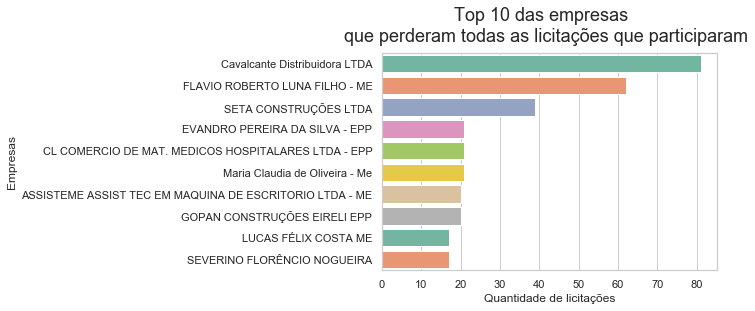

In [8]:
perdeu_tudo = propostas.loc[propostas['situacao_proposta'] == propostas['Perdedora']]
pt = perdeu_tudo[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="situacao_proposta", y="nome_proponente", data=pt, ci=None, palette="Set2")
figure = ax.get_figure()  
ax.set(xlabel='Quantidade de licitações', ylabel='Empresas')
figure.suptitle('Top 10 das empresas \n que perderam todas as licitações que participaram', y=1.04, fontsize=18)
figure.savefig('perdeutudo.png', dpi=400, bbox_inches="tight")

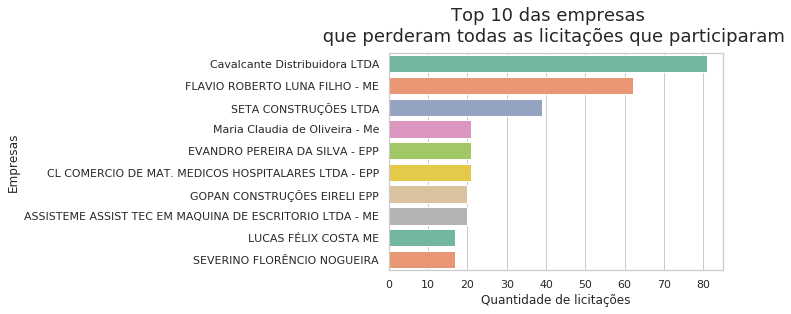

In [126]:
perdeu_tudo = propostas.loc[propostas['situacao_proposta'] == propostas['Perdedora']]
pt = perdeu_tudo[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="situacao_proposta", y="nome_proponente", data=pt, ci=None, palette="Set2")
figure = ax.get_figure()    
ax.set(xlabel='Quantidade de licitações', ylabel='Empresas')
figure.suptitle('Top 10 das empresas \n que perderam todas as licitações que participaram', y=1.04, fontsize=18)
figure.savefig('perdeutudo.png', dpi=400, bbox_inches="tight")

### Quais as top-10 empresas que mais receberam dinheiro em licitações de municípios no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total recebido pela empresa e no eixo-y o nome da empresa, ordenado do maior para o menor valor.

In [9]:
vencedoras = lic.groupby(['situacao_proposta']).get_group('Vencedora')
start_date  =  '01-01-2017' 
vencedoras['data_homologacao_licitacao'] = pd.to_datetime(vencedoras['data_homologacao_licitacao'])
mask = vencedoras['data_homologacao_licitacao'] > start_date
mandato = vencedoras.loc[mask]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


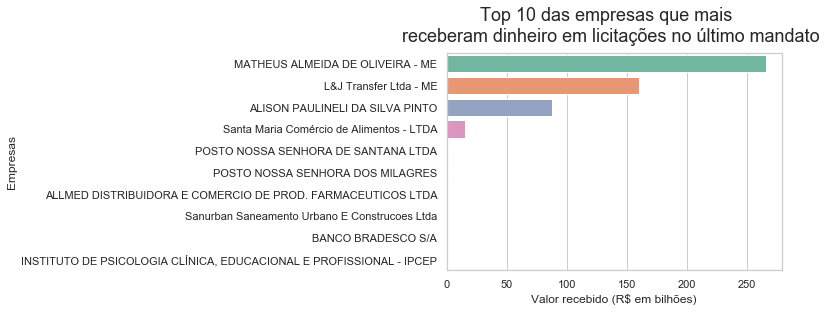

In [10]:
mais_recebeu = mandato[['nome_proponente','valor_proposta']].groupby('valor_proposta').sum().sort_values(by='valor_proposta', ascending=False).reset_index()
mr = mais_recebeu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="valor_proposta", y="nome_proponente", data=mr, ci=None, palette="Set2")
figure = ax.get_figure()   
ax.set(xlabel='Valor recebido (R$ em bilhões)', ylabel='Empresas')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Top 10 das empresas que mais \n receberam dinheiro em licitações no último mandato', y=1.04, fontsize=18)
figure.savefig('maisrecebeu.png', dpi=400, bbox_inches="tight")

### Quais os top-10 municípios que mais investiram dinheiro em licitações no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total gasto pelo município e no eixo-y o nome do município, ordenado do maior para o menor valor.

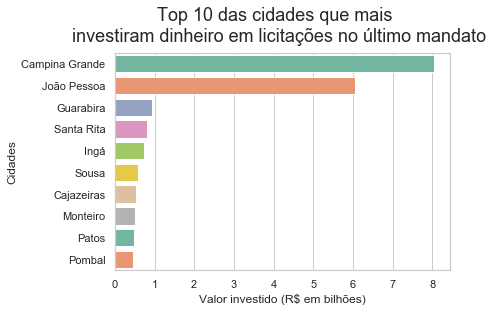

In [11]:
mais_investiu = mandato.groupby(['nome_municipio'])['valor_licitado_licitacao'].sum().to_frame().sort_values(by="valor_licitado_licitacao",ascending=False).reset_index()
mi = mais_investiu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="valor_licitado_licitacao", y="nome_municipio", data=mi, ci=None, palette="Set2")
figure = ax.get_figure()    
ax.set(xlabel='Valor investido (R$ em bilhões)', ylabel='Cidades')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Top 10 das cidades que mais \n investiram dinheiro em licitações no último mandato', y=1.04, fontsize=18)
figure.savefig('maisinvestiu.png', dpi=400, bbox_inches="tight")

### Qual a quantidade total de licitações realizadas por ano?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y a quantidade.

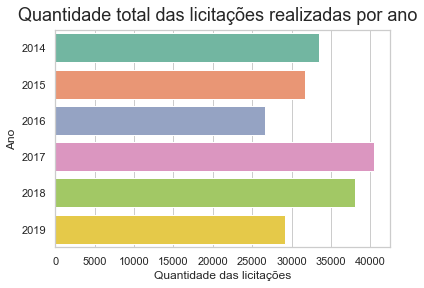

In [18]:
ano = lic['ano_homologacao_licitacao']
a =  ano.value_counts().to_frame().reset_index().rename(columns = {"index" : "ano", "ano_homologacao_licitacao" : "qtd_lic_ano"}).astype(int)
sns.set(style="whitegrid")
ax = sns.barplot(x="qtd_lic_ano", y="ano", data=a, ci=None, orient='h', palette="Set2")
figure = ax.get_figure()    
ax.set(xlabel='Quantidade das licitações', ylabel='Ano')
figure.suptitle('Quantidade total das licitações realizadas por ano', y=0.96, fontsize=18)
figure.savefig('qtd_lic_ano.png', dpi=400, bbox_inches="tight")

### Qual o valor total das licitações realizadas por ano (podemos testar por mês também)?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y o valor total.


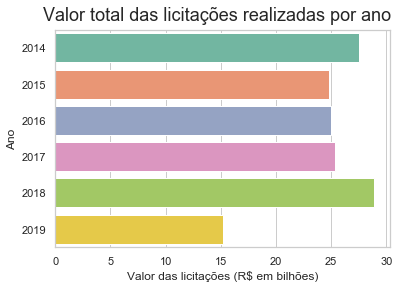

In [19]:
vltt = lic.groupby(['ano_homologacao_licitacao'])['valor_licitado_licitacao'].sum().to_frame().reset_index().rename(columns = {"ano_homologacao_licitacao" : "ano", "valor_licitado_licitacao" : "valor"})
v = vltt.astype(int)
sns.set(style="whitegrid")
ax = sns.barplot(y="ano", x="valor", data=v, ci=None, orient='h', palette="Set2")
figure = ax.get_figure()    
ax.set(ylabel='Ano', xlabel='Valor das licitações (R$ em bilhões)')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Valor total das licitações realizadas por ano', y=0.96, fontsize=18)
figure.savefig('valor_lic_ano.png', dpi=400, bbox_inches="tight")

### Qual a quantidade total de licitações realizadas por tipo de licitação no último mandato (Pregão, Convite, etc)?

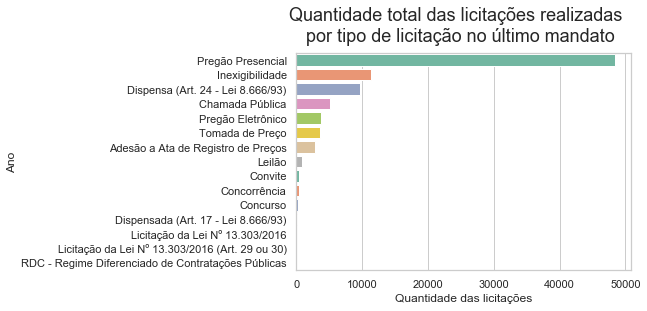

In [20]:
tipo_lic = mandato.nome_modalidade_licitacao.value_counts().to_frame().reset_index().rename(columns = {"index" : "tipo", "nome_modalidade_licitacao" : "qtd_tipo"})
sns.set(style="whitegrid")
ax = sns.barplot(y="tipo", x="qtd_tipo", data=tipo_lic, ci=None, palette="Set2")
figure = ax.get_figure()    
ax.set(ylabel='Ano', xlabel='Quantidade das licitações')
figure.suptitle('Quantidade total das licitações realizadas \n por tipo de licitação no último mandato', y=1.04, fontsize=18)
figure.savefig('qtd_tipo.png', dpi=400, bbox_inches="tight")

### Quantas empresas participaram de licitações no último mandato?

In [21]:
empresas = mandato.nome_proponente.value_counts()
empresas.count()

22266

### Qual o valor total das licitações realizadas no último mandato?

In [22]:
mandato.valor_licitado_licitacao.sum()

49898632493.01999

### Qual a quantidade total de licitações realizadas no último mandato?

In [26]:
#dados de 2003 a 2018
mandato.groupby[['numero_licitacao','nome_modalidade_licitacao','cd_ugestora']]['valor_licitado_licitacao'].min()

TypeError: 'method' object is not subscriptable